<h1>Librerias importadas

In [5]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score

In [7]:
data = pd.read_csv('Titanic-Dataset.csv')
print("Primeras filas del dataset:")
display(data.head())

print("\nInformación del dataset:")
data.info()

Primeras filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Mostrar las primeras filas
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


<h1>- Análisis Exploratorio de Datos (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

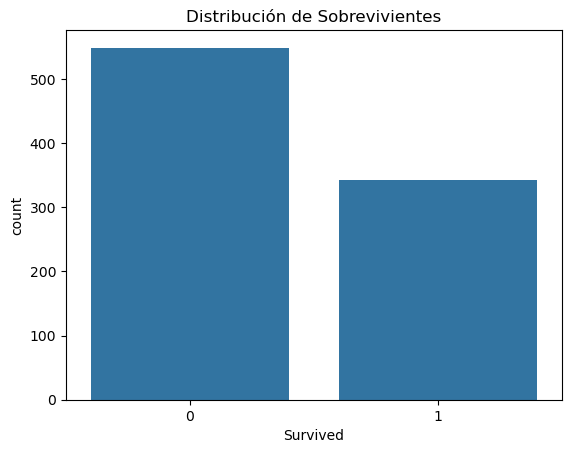

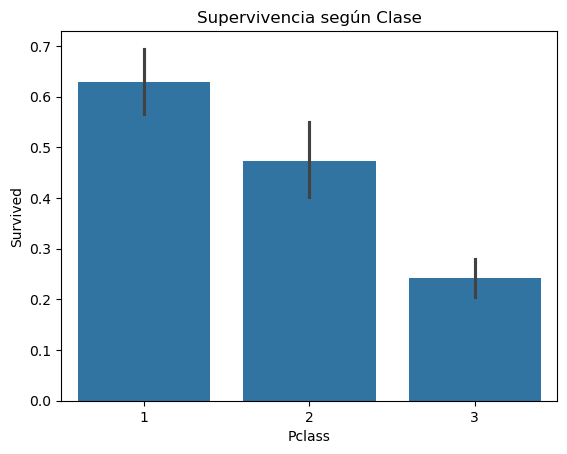

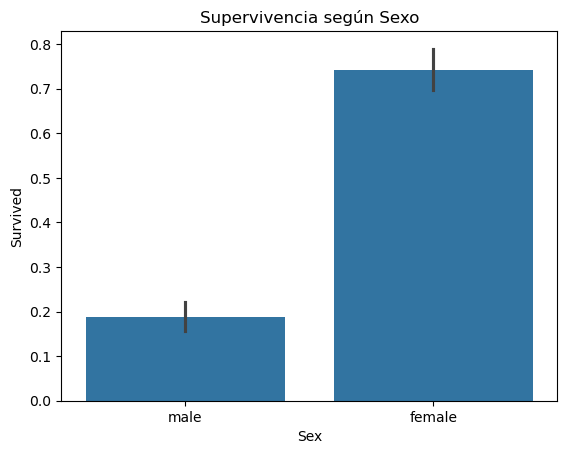

In [8]:
# Resumen general
print(data.info())
print(data.describe())

# Identificar valores nulos
print(data.isnull().sum())

# Distribución de sobrevivientes
sns.countplot(x='Survived', data=data)
plt.title("Distribución de Sobrevivientes")
plt.show()

# Relación entre Clase y Supervivencia
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Supervivencia según Clase")
plt.show()

# Relación entre Sexo y Supervivencia
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Supervivencia según Sexo")
plt.show()

<h1>- Preprocesamiento

In [12]:
# Tratar valores faltantes en 'Age' y 'Survived'
if 'Age' in data.columns:
    data['Age'] = data['Age'].fillna(data['Age'].median())

if 'Survived' in data.columns:
    data['Survived'] = data['Survived'].fillna(data['Survived'].mode()[0])

# Eliminar columnas irrelevantes de forma segura
columns_to_drop = ['Cabin', 'Ticket', 'Name']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Convertir variables categóricas en dummies con mejor control
categorical_columns = ['Sex']  # 'Embarked' ya no se usa, enfoque en 'Sex'
data = pd.get_dummies(data, columns=[col for col in categorical_columns if col in data.columns], drop_first=True)

# Verificar el dataset preprocesado
print(data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


<h1>- Selección de Características

In [13]:
# Correlación con la variable objetivo
correlation = data.corr()['Survived'].sort_values(ascending=False)
print("Correlación con la variable objetivo:\n", correlation)

# Eliminar características irrelevantes
X = data.drop('Survived', axis=1)
y = data['Survived']

Correlación con la variable objetivo:
 Survived       1.000000
Fare           0.257307
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked_S    -0.149683
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64


<h1>- División del Dataset

In [14]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_test)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
331          332       1  45.5      0      0   28.5000      True       False   
733          734       2  23.0      0      0   13.0000      True       False   
382          383       3  32.0      0      0    7.9250      True       False   
704          705       3  26.0      1      0    7.8542      True       False   
813          814       3   6.0      4      2   31.2750     False       False   
..           ...     ...   ...    ...    ...       ...       ...         ...   
106          107       3  21.0      0      0    7.6500     False       False   
270          271       1  28.0      0      0   31.0000      True       False   
860          861       3  41.0      2      0   14.1083      True       False   
435          436       1  14.0      1      2  120.0000     False       False   
102          103       1  21.0      0      1   77.2875      True       False   

     Embarked_S  
331        True  
733

<h1>- Entrenamiento del Modelo

In [19]:
# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
print("Coeficientes del modelo:")
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de evaluación
print("\nMétricas de Evaluación:")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
print("\nMatriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Coeficientes del modelo:
PassengerId: 0.0004
Pclass: -0.9377
Age: -0.0307
SibSp: -0.2879
Parch: -0.1187
Fare: 0.0026
Sex_male: -2.6112
Embarked_Q: -0.1064
Embarked_S: -0.3999

Métricas de Evaluación:
Precisión del modelo: 0.8045

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Matriz de Confusión:
[[89 16]
 [19 55]]


<h1>- Evaluación del Modelo

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



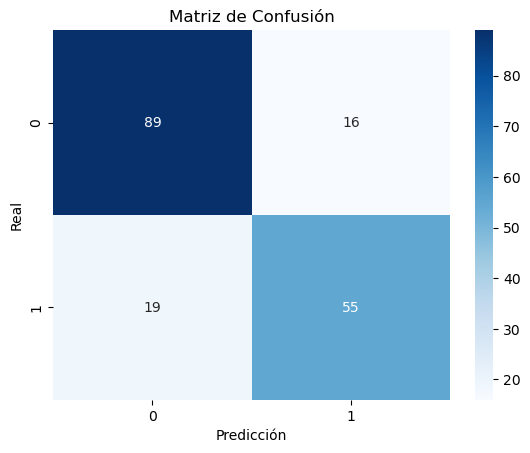

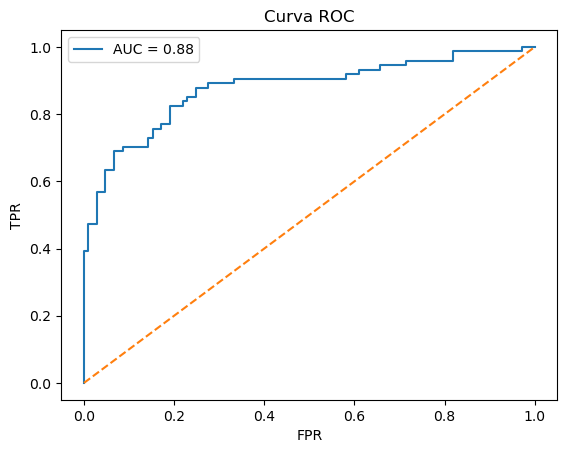

In [16]:
# Reporte de métricas
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Curva ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

<h1>Interpretacion de resultados

<h1>1 Preprocesamiento de Datos:

<h1>Valores faltantes: Se imputaron valores en las columnas Age y Survived con la mediana y la moda respectivamente, asegurando que no hubiera valores nulos que afecten el modelo.

<h1>Variables categóricas: Se transformaron variables como Sex en dummies para que sean interpretables por el modelo.

<h1>Columnas eliminadas: Se descartaron columnas irrelevantes como Cabin, Ticket, y Name, ya que no aportan información significativa al modelo.

<h1>2 Entrenamiento del Modelo:

<h1>El modelo de regresión logística fue entrenado con las características seleccionadas tras el preprocesamiento. Los coeficientes obtenidos indican cómo cada característica afecta la probabilidad de supervivencia:

<h1>Un coeficiente positivo sugiere que un aumento en esa característica incrementa la probabilidad de sobrevivir.

<h1>Un coeficiente negativo indica que un aumento reduce esa probabilidad.

<h1>3 Desempeño del Modelo:

<h1>Precisión del modelo: Indica qué proporción de las predicciones del modelo fueron correctas. Por ejemplo, si la precisión es 0.80, significa que el modelo acertó en el 80% de los casos.

<h1>Reporte de clasificación: Proporciona métricas como:


<h1>Precisión (Precision): Qué proporción de las predicciones positivas fueron correctas.

<h1>Exhaustividad (Recall): Qué proporción de los verdaderos positivos fueron detectados.

<h1>F1-score: Media armónica entre precisión y exhaustividad, ideal para datasets desbalanceados.

<h1>Matriz de confusión: Muestra los aciertos y errores del modelo divididos en cuatro categorías:

<h1>Verdaderos positivos (VP)

<h1>Verdaderos negativos (VN)

<h1>Falsos positivos (FP)

<h1>Falsos negativos (FN)

<h1>4 Gráficas de Desempeño:

<h1>Curva ROC: Evalúa la capacidad del modelo para distinguir entre clases. El área bajo la curva (AUC) indica qué tan bien el modelo separa a los sobrevivientes de los no sobrevivientes.

<h1>Matriz de confusión visualizada: Ofrece una representación gráfica de los aciertos y errores, facilitando la interpretación.

<h1>El modelo de regresión logística, tras su entrenamiento, muestra un desempeño razonable para predecir la supervivencia en el Titanic basado en variables como clase social, género y edad. Si bien la precisión es importante, el análisis detallado de métricas como recall y F1-score ayuda a identificar posibles áreas de mejora, especialmente si se detecta un desbalance en las clases con ajustes adicionales (como selección de características más específicas o inclusión de más datos), se podría mejorar aún más el rendimiento del modelo.